In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
# Reading Amgen Stock data

df_amgen = pd.read_csv('AMGN.csv')

In [3]:
df_amgen.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-08-2022,246.690002,247.850006,243.779999,243.910004,238.283737,2295100
1,03-08-2022,245.940002,249.330002,245.179993,247.139999,241.439224,2061400
2,04-08-2022,247.000000,249.000000,246.199997,246.979996,241.282913,2650600
3,05-08-2022,246.460007,247.080002,241.789993,246.250000,240.569763,2723900
4,08-08-2022,245.000000,247.740005,244.309998,247.289993,241.585754,2784400


In [4]:
# data info

df_amgen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       180 non-null    object 
 1   Open       180 non-null    float64
 2   High       180 non-null    float64
 3   Low        180 non-null    float64
 4   Close      180 non-null    float64
 5   Adj Close  180 non-null    float64
 6   Volume     180 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.0+ KB


In [5]:
# We are going to predict Closing price, so dropping rest features

df_amgen = df_amgen[['Date', 'Close']]

In [6]:
df_amgen.head()

,Date,Close
0,02-08-2022,243.910004
1,03-08-2022,247.139999
2,04-08-2022,246.979996
3,05-08-2022,246.250000
4,08-08-2022,247.289993


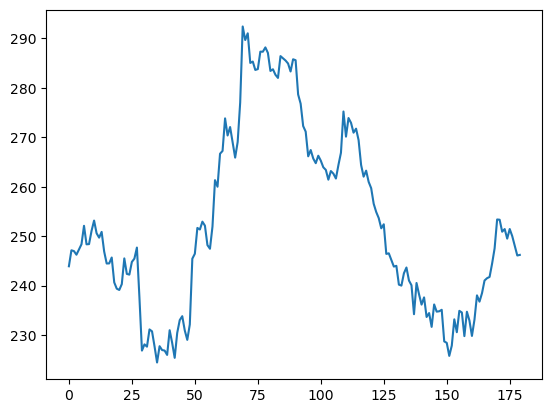

In [7]:
# zero NA's and missing values and outliers

plt.plot(df_amgen['Close'])

## Reshape for Standardizing data

In [8]:
# Let's create a single sequence (i.e., feature) for standardization
price_close = np.array(df_amgen['Close']).reshape(-1, 1)

price_close.shape

(180, 1)

## Standardize the feature

In [9]:
scaler = StandardScaler()
price_close_scaled = scaler.fit_transform(price_close)

### Predicting a time series object which needs to be in chronological order

In [10]:
# Splitting based on order

split_point = int(len(price_close_scaled) * 0.7)
train, test = price_close_scaled[:split_point], price_close_scaled[split_point:]


## Let's keep it simple and create X_train, X_test, y_train, y_test using a 9:1 ratio as we are predicting 10th day price based on last 9 days

In [11]:
# 9 days split
num_cols = 9


X_train = []
y_train = []
for i in range(len(train) - num_cols):
    X_train.append(train[i:i+num_cols])
    y_train.append(train[i+num_cols])

X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(len(test) - num_cols):
    X_test.append(test[i:i+num_cols])
    y_test.append(test[i+num_cols])

X_test, y_test = np.array(X_test), np.array(y_test)


In [12]:
X_train[1]

array([[-0.28447413],
       [-0.2932459 ],
       [-0.33326611],
       [-0.27625108],
       [-0.21759055],
       [-0.01310285],
       [-0.2181385 ],
       [-0.21594599],
       [-0.06847326]])

In [13]:
X_test[1]

array([[-0.32449429],
       [-0.31791586],
       [-0.39247454],
       [-0.46483982],
       [-0.45661677],
       [-0.66494249],
       [-0.67590683],
       [-0.53885054],
       [-0.47525621]])

In [14]:
y_train[1]

array([0.04500891])

In [15]:
y_test[1]

array([-0.61943969])

## Simple RNN

In [16]:
rnn_model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [17]:
np.random.seed(42)
tf.random.set_seed(42)

rnn_model.compile(loss="mse", optimizer='Adam')

In [18]:
# Train the model
history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
2/2 [==============================] - 2s 10ms/step - loss: 1.3088
Epoch 2/50
2/2 [==============================] - 0s 5ms/step - loss: 1.1393
Epoch 3/50
2/2 [==============================] - 0s 3ms/step - loss: 0.9835
Epoch 4/50
2/2 [==============================] - 0s 4ms/step - loss: 0.8406
Epoch 5/50
2/2 [==============================] - 0s 3ms/step - loss: 0.7160
Epoch 6/50
2/2 [==============================] - 0s 5ms/step - loss: 0.6104
Epoch 7/50
2/2 [==============================] - 0s 5ms/step - loss: 0.5257
Epoch 8/50
2/2 [==============================] - 0s 4ms/step - loss: 0.4384
Epoch 9/50
2/2 [==============================] - 0s 3ms/step - loss: 0.3591
Epoch 10/50
2/2 [==============================] - 0s 4ms/step - loss: 0.2875
Epoch 11/50
2/2 [==============================] - 0s 6ms/step - loss: 0.2326
Epoch 12/50
2/2 [==============================] - 0s 9ms/step - loss: 0.1874
Epoch 13/50
2/2 [==============================] - 0s 3ms/step - loss: 0

## Predictions

In [19]:
#Predict:
y_pred = rnn_model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [20]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [21]:
comparison

,actual,predicted
0,243.660004,241.105331
1,241.029999,242.554565
2,240.070007,240.976349
3,234.220001,239.951141
4,240.529999,236.190674
5,238.240005,238.485458
6,236.160004,237.902878
7,237.619995,237.036484
8,233.660004,236.929855
9,234.449997,234.944977


In [22]:
rnn_model_mse = mean_squared_error(comparison['actual'], comparison['predicted'])

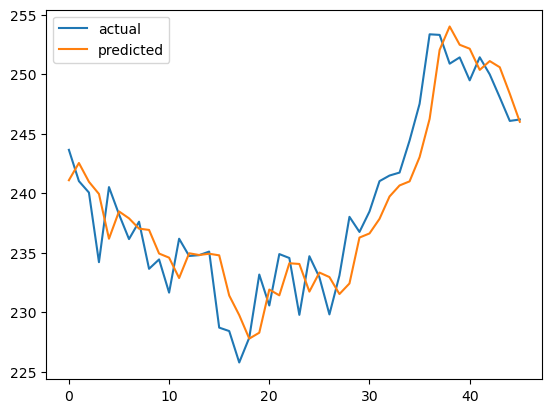

In [23]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## LSTM with 2 Layers

In [24]:
lstm_model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [25]:
np.random.seed(42)
tf.random.set_seed(42)

lstm_model.compile(loss="mse", optimizer='Adam')

In [26]:
# Train the model
history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
2/2 [==============================] - 4s 12ms/step - loss: 1.0718
Epoch 2/50
2/2 [==============================] - 0s 7ms/step - loss: 0.9419
Epoch 3/50
2/2 [==============================] - 0s 10ms/step - loss: 0.8183
Epoch 4/50
2/2 [==============================] - 0s 11ms/step - loss: 0.6978
Epoch 5/50
2/2 [==============================] - 0s 8ms/step - loss: 0.5837
Epoch 6/50
2/2 [==============================] - 0s 7ms/step - loss: 0.4800
Epoch 7/50
2/2 [==============================] - 0s 13ms/step - loss: 0.3956
Epoch 8/50
2/2 [==============================] - 0s 8ms/step - loss: 0.3320
Epoch 9/50
2/2 [==============================] - 0s 8ms/step - loss: 0.2973
Epoch 10/50
2/2 [==============================] - 0s 7ms/step - loss: 0.2915
Epoch 11/50
2/2 [==============================] - 0s 10ms/step - loss: 0.2892
Epoch 12/50
2/2 [==============================] - 0s 7ms/step - loss: 0.2805
Epoch 13/50
2/2 [==============================] - 0s 7ms/step - los

In [27]:
#Predict:
y_pred = lstm_model.predict(X_test)

2/2 [==============================] - 1s 4ms/step


In [28]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [29]:
comparison

,actual,predicted
0,243.660004,244.809799
1,241.029999,243.924103
2,240.070007,243.450867
3,234.220001,242.932465
4,240.529999,242.143982
5,238.240005,241.595016
6,236.160004,241.049591
7,237.619995,240.615463
8,233.660004,240.202881
9,234.449997,239.483902


In [30]:
lstm_mse = mean_squared_error(comparison['actual'], comparison['predicted'])

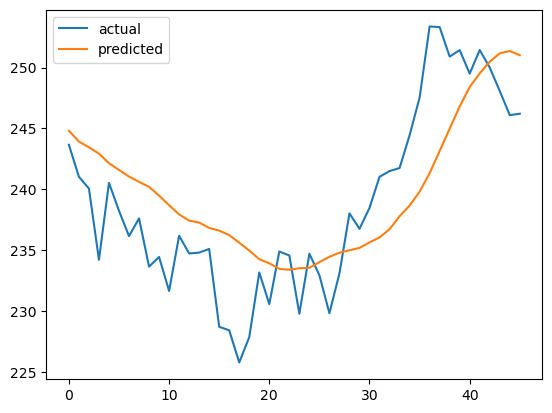

In [31]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## GRU (With more layers)

In [32]:
gru_model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [33]:
np.random.seed(42)
tf.random.set_seed(42)

gru_model.compile(loss="mse", optimizer='Adam')

In [34]:
# Train the model
history = gru_model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
2/2 [==============================] - 3s 10ms/step - loss: 1.0309
Epoch 2/50
2/2 [==============================] - 0s 8ms/step - loss: 0.9386
Epoch 3/50
2/2 [==============================] - 0s 10ms/step - loss: 0.8558
Epoch 4/50
2/2 [==============================] - 0s 6ms/step - loss: 0.7764
Epoch 5/50
2/2 [==============================] - 0s 6ms/step - loss: 0.7019
Epoch 6/50
2/2 [==============================] - 0s 6ms/step - loss: 0.6296
Epoch 7/50
2/2 [==============================] - 0s 11ms/step - loss: 0.5619
Epoch 8/50
2/2 [==============================] - 0s 8ms/step - loss: 0.4946
Epoch 9/50
2/2 [==============================] - 0s 7ms/step - loss: 0.4322
Epoch 10/50
2/2 [==============================] - 0s 8ms/step - loss: 0.3755
Epoch 11/50
2/2 [==============================] - 0s 7ms/step - loss: 0.3278
Epoch 12/50
2/2 [==============================] - 0s 10ms/step - loss: 0.2846
Epoch 13/50
2/2 [==============================] - 0s 6ms/step - loss

In [35]:
#Predict:
y_pred = gru_model.predict(X_test)

2/2 [==============================] - 1s 4ms/step


In [36]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [37]:
comparison

,actual,predicted
0,243.660004,240.926071
1,241.029999,242.420868
2,240.070007,241.012695
3,234.220001,239.722198
4,240.529999,235.101288
5,238.240005,238.355728
6,236.160004,237.930099
7,237.619995,236.110352
8,233.660004,236.707062
9,234.449997,233.960480


In [38]:
gru_mse = mean_squared_error(comparison['actual'], comparison['predicted'])

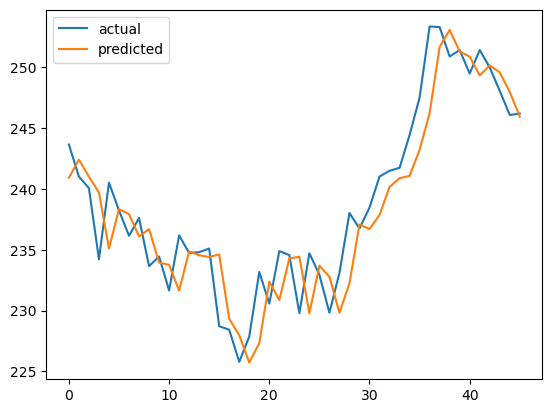

In [39]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Conv1D

In [40]:
conv1d_model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [41]:
np.random.seed(42)
tf.random.set_seed(42)

conv1d_model.compile(loss="mse", optimizer='Adam')

history = conv1d_model.fit(X_train, y_train, epochs=30)

Epoch 1/30
4/4 [==============================] - 3s 7ms/step - loss: 1.1192
Epoch 2/30
4/4 [==============================] - 0s 7ms/step - loss: 0.9252
Epoch 3/30
4/4 [==============================] - 0s 7ms/step - loss: 0.7409
Epoch 4/30
4/4 [==============================] - 0s 5ms/step - loss: 0.5695
Epoch 5/30
4/4 [==============================] - 0s 5ms/step - loss: 0.4056
Epoch 6/30
4/4 [==============================] - 0s 5ms/step - loss: 0.2956
Epoch 7/30
4/4 [==============================] - 0s 5ms/step - loss: 0.2519
Epoch 8/30
4/4 [==============================] - 0s 5ms/step - loss: 0.2135
Epoch 9/30
4/4 [==============================] - 0s 7ms/step - loss: 0.1616
Epoch 10/30
4/4 [==============================] - 0s 6ms/step - loss: 0.1428
Epoch 11/30
4/4 [==============================] - 0s 6ms/step - loss: 0.1560
Epoch 12/30
4/4 [==============================] - 0s 6ms/step - loss: 0.1542
Epoch 13/30
4/4 [==============================] - 0s 5ms/step - loss: 0.

In [42]:
#Predict:
y_pred = conv1d_model.predict(X_test)

2/2 [==============================] - 1s 4ms/step


In [43]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [44]:
comparison

,actual,predicted
0,243.660004,240.248795
1,241.029999,241.666733
2,240.070007,241.521683
3,234.220001,240.245026
4,240.529999,237.696182
5,238.240005,237.160187
6,236.160004,238.768280
7,237.619995,237.363739
8,233.660004,236.888855
9,234.449997,235.893005


In [45]:
conv1d_mse = mean_squared_error(comparison['actual'], comparison['predicted'])

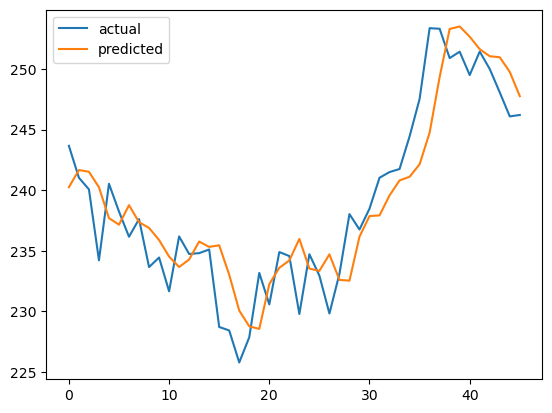

In [46]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

In [47]:
print('Root Mean Squared Error for SimpleRNN Model is:' + str(rnn_model_mse))
print('Root Mean Squared Error for LSTM Model is:' + str(lstm_mse))
print('Root Mean Squared Error for GRU Model is:' + str(gru_mse))
print('Root Mean Squared Error for Conv1D Model is:' + str(conv1d_mse))

Root Mean Squared Error for SimpleRNN Model is:8.691265485435457
Root Mean Squared Error for LSTM Model is:25.091690079898548
Root Mean Squared Error for GRU Model is:9.239494726390626
Root Mean Squared Error for Conv1D Model is:10.682944505289637


# Conclusion

## The Root Mean Squared Error (RMSE) values have been calculated for various models and are as follows:

## SimpleRNN: 8.6912
## LSTM: 25.0916
## GRU: 9.2394
## Conv1D: 10.6829
## Based on the RMSE values, it can be observed that the SimpleRNN model outperforms the other models, with GRU coming in second place, followed by the Conv1D model, and finally the LSTM model. While the RMSE values provide a useful metric for evaluating the performance of different models, it's important to keep in mind that they are not the only factor to consider. Other factors such as training time, complexity, and interpretability may also play a role in determining the best model for a given task. Therefore, it's important to carefully consider all of these factors when selecting a model for your specific application. Additionally, it's always a good idea to experiment with different models and hyperparameters to find the best possible solution for your particular problem.